<a href="https://colab.research.google.com/github/amitansu1024/Android-dev/blob/main/CUDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Intersection point is x=-2.500000,y=-3.519391,=-2.500000:
Intersection point is x=2.500000,y=-3.519914,=-2.500000:
Intersection point is x=-2.500000,y=-3.519391,=2.500000:
Intersection point is x=2.500000,y=-3.519914,=2.500000:
8


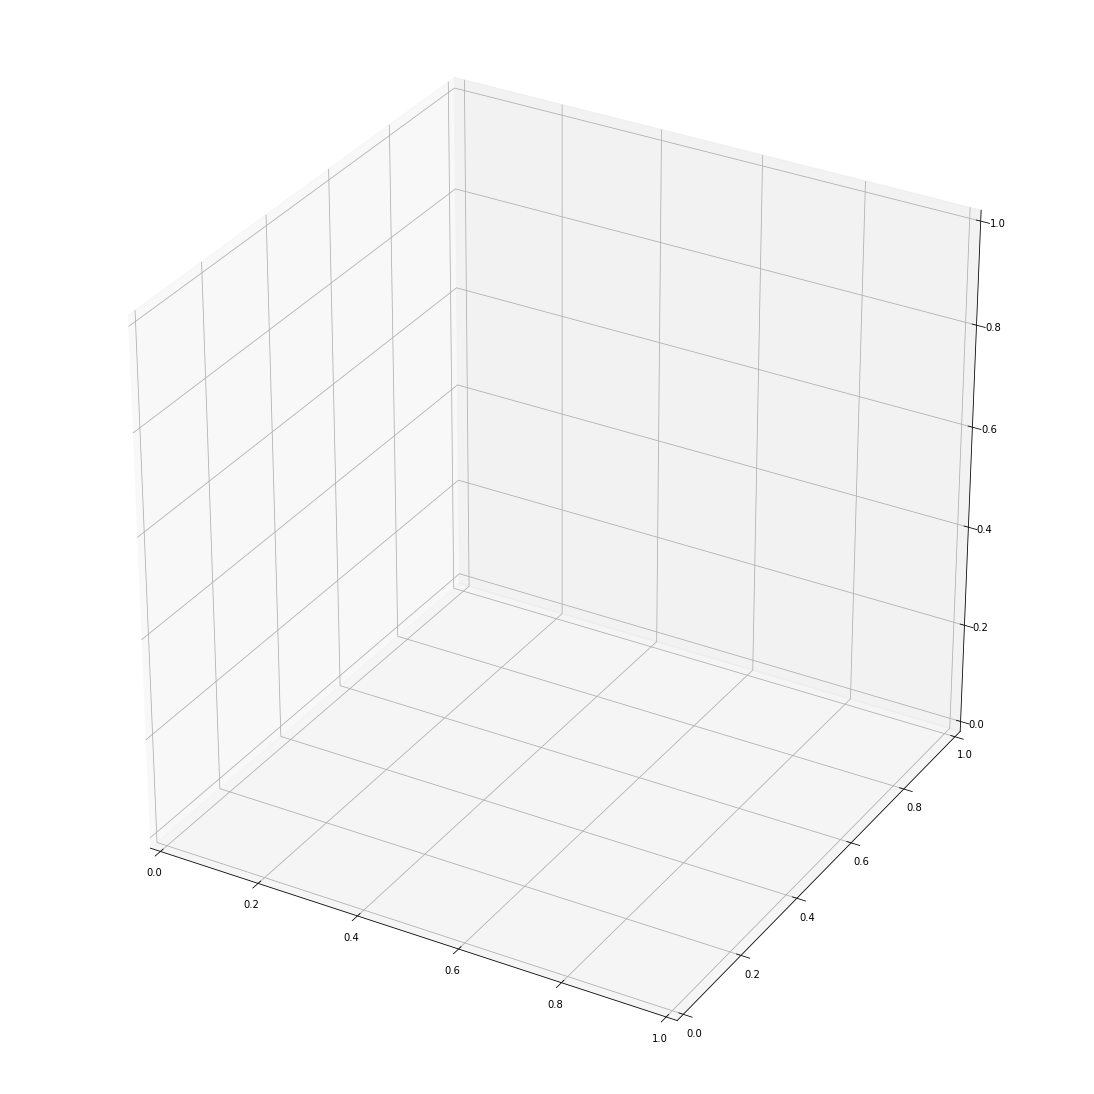

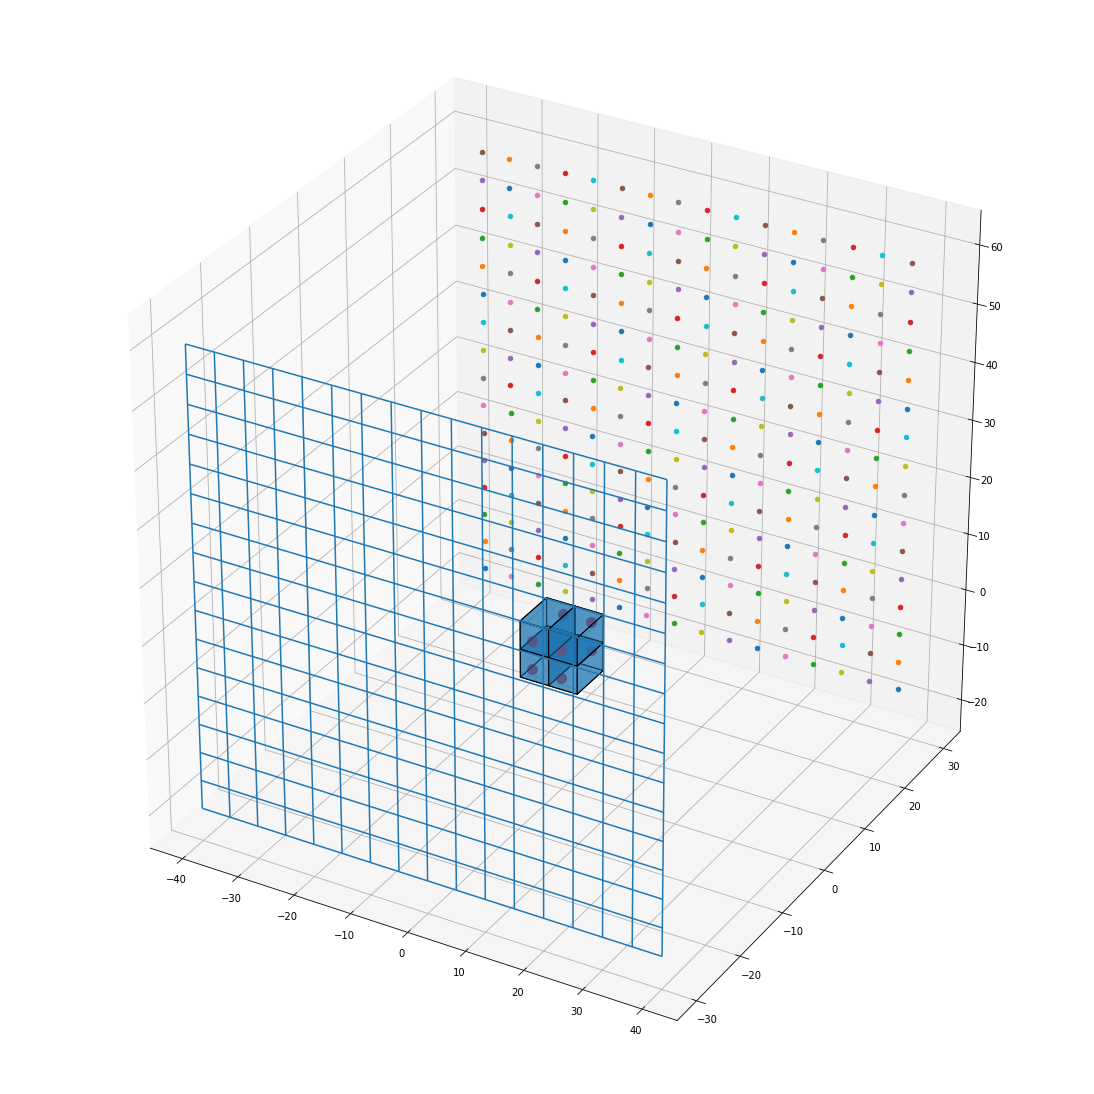

In [22]:
from matplotlib import pyplot
from numba import cuda
from mpl_toolkits import mplot3d
figure = pyplot.figure(figsize=(15,15))
axes = mplot3d.Axes3D(figure)
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
count=0
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
def cuboid_data2(o, size=(1,1,1)):
  X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
  [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
  [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
  [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
  [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
  [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
  X = np.array(X).astype(float)
  for i in range(3):
    X[:,:,i] *= size[i]
  X += np.array(o)
  return X
def plotCubeAt2(positions,sizes=None, **kwargs):
  if not isinstance(sizes,(list,np.ndarray)):
    sizes=[(1,1,1)]*len(positions)
  g = []
  for p,s in zip(positions,sizes):
    g.append( cuboid_data2(p, size=s) )
  return Poly3DCollection(np.concatenate(g), **kwargs)

def ray_intersect_triangle(p0, p1, triangle):
  v0, v1, v2 = triangle
  u = v1 - v0
  v = v2 - v0
  normal = np.cross(u, v)
  b = np.inner(normal, p1 - p0)
  a = np.inner(normal, v0 - p0)
  if (b == 0.0):
    # ray is parallel to the plane
    if a != 0.0:
    # ray is outside but parallel to the plane
      return 0
    else:
    # ray is parallel and lies in the plane
      rI = 0.0
  else:
    rI = a / b
  if rI < 0.0:
    return 0
  w = p0 + rI * (p1 - p0) - v0
  dir = p1-p0
  # // ray direction vector
  intrs = p0+rI*dir# *I = R.P0 + r * dir; //

  #intersect point of ray and plane//

  denom = np.inner(u, v) * np.inner(u, v) - \
    np.inner(u, u) * np.inner(v, v)
  si = (np.inner(u, v) * np.inner(w, v) - \
    np.inner(v, v) * np.inner(w, u)) / denom
  if (si < 0.0) | (si > 1.0):
    return 0
  ti = (np.inner(u, v) * np.inner(w, u) - \
    np.inner(u, u) * np.inner(w, v)) / denom
  if (ti < 0.0) | (si + ti > 1.0):
    return 0
  if (rI == 0.0):
    return 2
  axes.scatter(intrs[0],intrs[1], intrs[2],s=100,color='red')
  if(intrs[1]<=0):
    x=intrs[0]-2.5
    y=int(intrs[1])
    z=intrs[2]-2.5
    position=[(x,y,z)]
    y_size=(abs(y))*2
    size=[(5,y_size,5)]
    pc=plotCubeAt2(position,size,edgecolor="k",alpha=0.5)
    axes.add_collection3d(pc)
    print("Intersection point is x=%f,y=%f,=%f:"   %(intrs[0],intrs[1], intrs[2])) 
    
  return 1
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
# Create a new plot
figure = pyplot.figure(figsize=(15,15))
axes = mplot3d.Axes3D(figure)
# Load the STL files and add the vectors to the plot

your_mesh = mesh.Mesh.from_file('/content/gdrive/MyDrive/ColabNotebooks/S.stl')
#axes.add_collection3D(mplot3D.art3D.Poly3DCollection(your_mesh.vectors))
# Auto scale to the mesh size
scale = your_mesh.points.flatten('F')
axes.auto_scale_xyz(scale, scale, scale)
x=np.arange(-37.5,42.5,5)
z=np.arange(-17.5,62.5,5)
for i in x:
  for j in z:
    axes.scatter(i,30,j)
X=np.arange(-40,45,5)
Z=np.arange(-20,65,5)
Y=np.array([[-30]])
X,Z=np.meshgrid(X,Z)
axes.plot_wireframe(X,Y,Z,rstride=1, cstride=1)
from itertools import islice
for point in your_mesh.points:
  itr = iter(point)
  t=[list(islice(itr,3)) for i in range(3) ]
  t=np.array(t)
  for i in x:
    for j in z:
      if(ray_intersect_triangle(np.array([i,-30,j]),np.array([i,30,j]),t
      ) == 1):
        count+=1
print(count)
pyplot.show()

ModuleNotFoundError: ignored

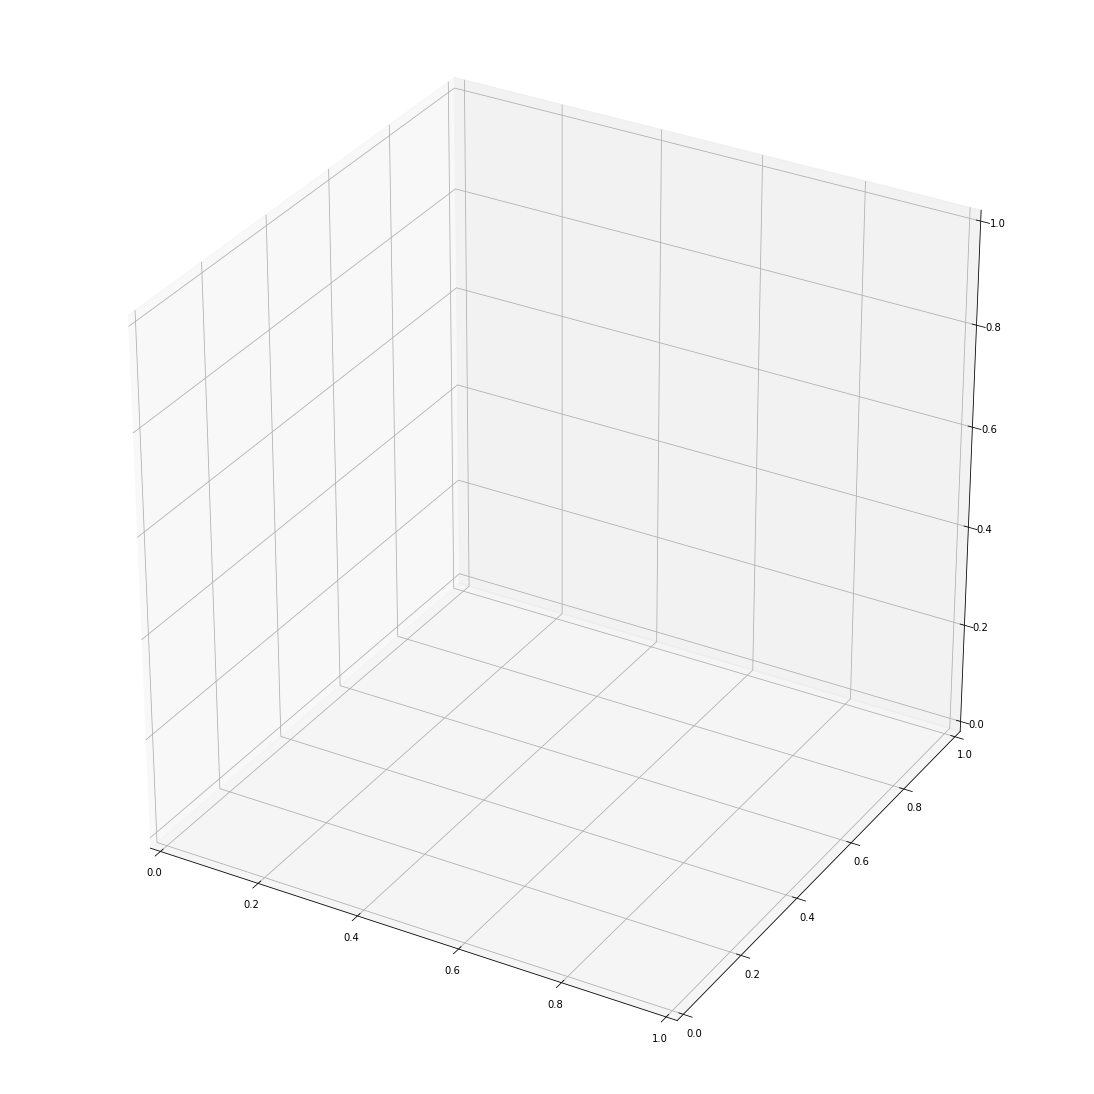

In [15]:

from matplotlib import pyplot
from numba import cuda
from mpl_toolkits import mplot3d
figure = pyplot.figure(figsize=(15,15))
axes = mplot3d.Axes3D(figure)
import numpy as np
count=0
from mpl_toolkits.mplot3d.art3D import Poly3DCollection
def cuboid_data2(o, size=(1,1,1)):
  X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
  [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
  [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
  [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
  [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
  [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
  X = np.array(X).astype(float)
  for i in range(3):
    X[:,:,i] *= size[i]
  X += np.array(o)
  return X
def plotCubeAt2(positions,sizes=None, **kwargs):
  if not isinstance(sizes,(list,np.ndarray)):
    sizes=[(1,1,1)]*len(positions)
  g = []
  for p,s in zip(positions,sizes):
    g.append( cuboid_data2(p, size=s) )
  return Poly3DCollection(np.concatenate(g), **kwargs)

def ray_intersect_triangle(p0, p1, triangle):
    v0, v1, v2 = triangle
    u = v1 - v0
    v = v2 - v0
    normal = cp.cross(u, v)
    b = cp.inner(normal, p1 - p0)
    a = cp.inner(normal, v0 - p0)
    if (b == 0.0):
        # ray is parallel to the plane
        if a != 0.0:
            # ray is outside but parallel to the plane
            return 0
        else:
            # ray is parallel and lies in the plane
            rI = 0.0
    else:
        rI = a / b
    if rI < 0.0:
        return 0
    w = p0 + rI * (p1 - p0) - v0
    dir = p1-p0
    # // ray direction vector
    intrs = p0+rI*dir# *I = R.P0 + r * dir; //

    #intersect point of ray and plane//

    denom = cp.inner(u, v) * cp.inner(u, v) - \
        cp.inner(u, u) * cp.inner(v, v)
    si = (cp.inner(u, v) * cp.inner(w, v) - \
        cp.inner(v, v) * cp.inner(w, u)) / denom
    if (si < 0.0) | (si > 1.0):
        return 0
    ti = (cp.inner(u, v) * cp.inner(w, u) - \
        cp.inner(u, u) * cp.inner(w, v)) / denom
    if (ti < 0.0) | (si + ti > 1.0):
        return 0
    if (rI == 0.0):
        return 2
    axes.scatter(intrs[0],intrs[1], intrs[2],s=100,color='red')
    if(intrs[1]<=0):
        x=intrs[0]-2.5
        y=int(intrs[1])
        z=intrs[2]-2.5
        position=[(x,y,z)]
        y_size=(abs(y))*2
        size=[(5,y_size,5)]
        pc=plotCubeAt2(position,size,edgecolor="k",alpha=0.5)
        axes.add_collection3d(pc)
        print("Intersection point is x=%f,y=%f,=%f:"   %(intrs[0],intrs[1], intrs[2])) 
        
    return 1
    